In [89]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import os
from Dataset.MakeDataset import X,y 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [90]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming X is your data with shape (180, 500, 3)
# X = np.random.rand(180, 500, 3)  # Example data

# Step 1: Flatten the data along the last two dimensions
X_flattened = X.reshape(180, -1)  # This will reshape X to (180, 1500)

# Step 2: Apply PCA to retain a specific percentage of variance
variance_to_retain = 0.95  # Specify the percentage of variance to retain (e.g., 95%)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_flattened)

# X_reduced will have the shape (180, number_of_components_retained)
print("Original shape:", X.shape)
print("Flattened shape:", X_flattened.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (180, 500, 3)
Flattened shape: (180, 1500)
Reduced shape: (180, 2)


In [91]:
# X.shape, y.shape
def label(x):
    dict1 = {1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}
    return dict1[x]

X.shape

X_tfsel = X
# X = X.mean(axis=1)
X = X_reduced

y_labels = []
for i in range(len(y)):
    y_labels.append(label(y[i]))



(126, 2) (126,)
(126, 2) (126,)
(126, 2) (126,)
(126, 2) (126,)
(126, 2) (126,)
(126, 2) (126,)
(126, 2) (126,)
(126, 2) (126,)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

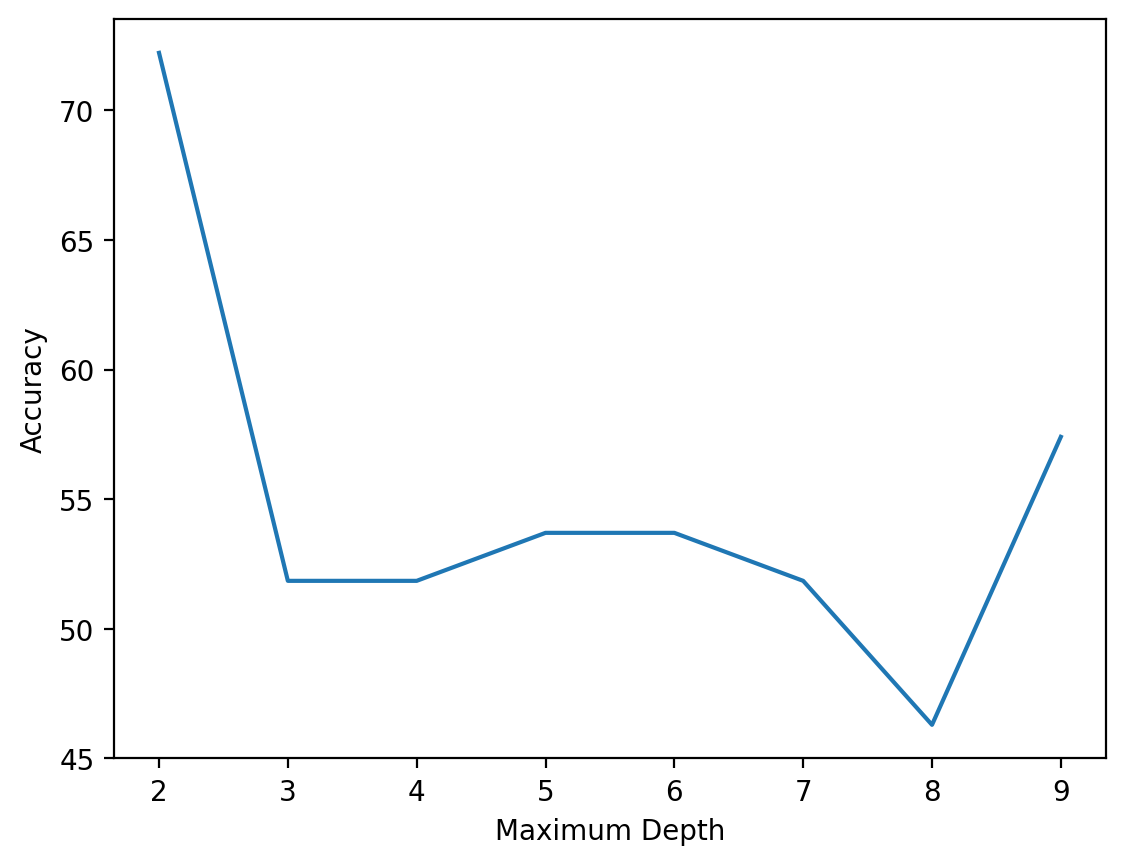

In [92]:
X_list = []
y_list = []

for i in range(2,10):
    X_list.append(i)
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20,stratify=y)
    print(X_train.shape, y_train.shape)
    dt.fit(X_train, y_train)
    y_predicted = dt.predict(X_test)
    y_predicted = pd.DataFrame({'Label':y_predicted})
    # accuracy = len(y_predicted[y_predicted['Label']==y_test])/len(y_test)
    y_list.append(accuracy*100)
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_predicted)

plt.plot(X_list, y_list)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()


In [93]:
print(f"Accuracy: {accuracy*100:.4f}")
print(f"Precision: {precision*100:.4f}")
print(f"Recall: {recall*100:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 55.5556
Precision: 56.0823
Recall: 55.5556
Confusion Matrix:
[[1 3 3 1 1 0]
 [2 6 0 0 1 0]
 [3 1 3 1 1 0]
 [1 0 0 8 0 0]
 [4 1 1 0 3 0]
 [0 0 0 0 0 9]]


*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1986/3527005149.py:19: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel)])



*** Feature extraction finished ***


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


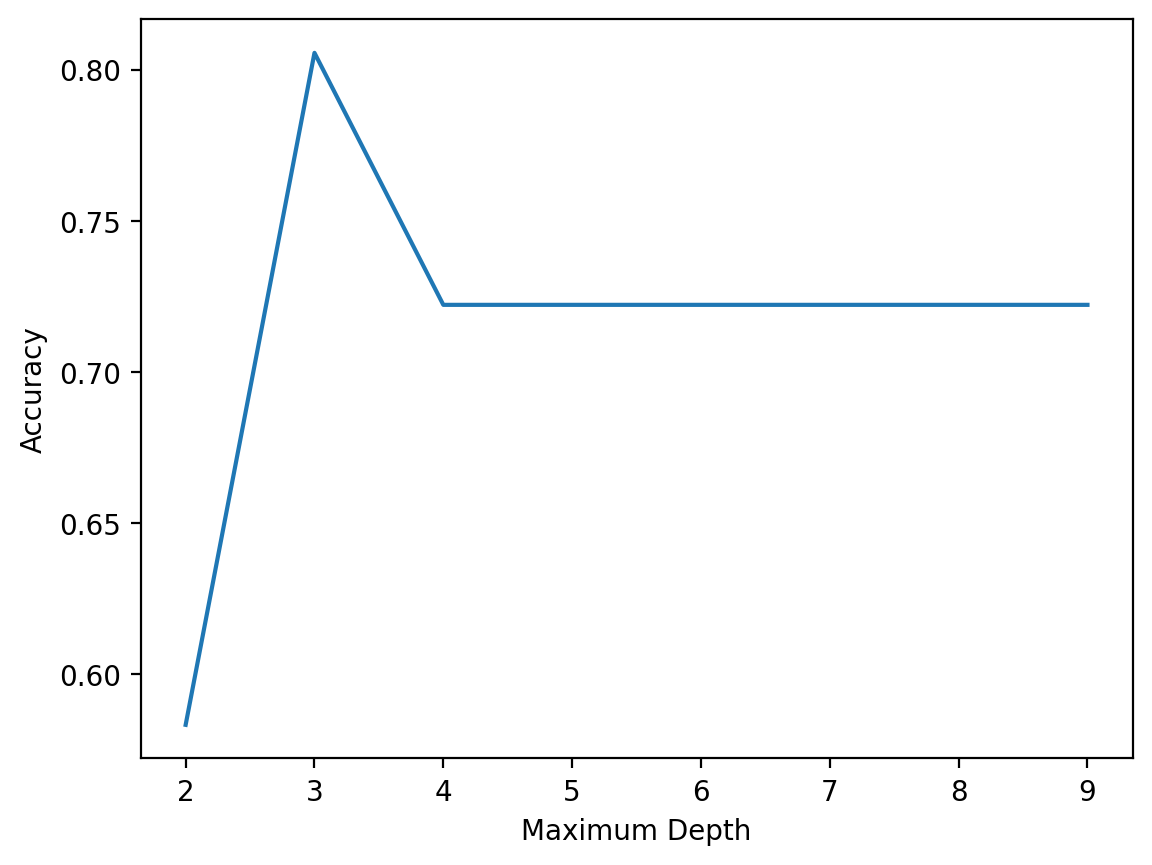

Accuracy: 0.7222
Precision: 0.7523
Recall: 0.7222
Confusion Matrix:
[[4 1 1 0 0 0]
 [1 4 2 0 0 0]
 [0 1 2 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 3 5 0]
 [0 0 0 0 0 6]]


In [94]:
# Install TSFEL if not already installed
# !pip install tsfel

import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Assuming X has shape (180, 500, 3)

# Define an empty DataFrame to store extracted features
import pandas as pd
features_df = pd.DataFrame()
cfg = tsfel.get_features_by_domain()

# Extract features for each axis (X, Y, Z) separately and concatenate
# for i in range(X_tfsel.shape[0]):
    # Extract features for each axis
tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X_tfsel)])
                            # for j in range(X_tfsel.shape[2])], axis=1)

# Append to the features DataFrame
features_df = pd.concat([features_df, tsfel_features], ignore_index=True)

# Convert features DataFrame to numpy array
X_features = features_df.to_numpy()
# print(X_features)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
accuracy_list = []
depth_list = []
for i in range(2,10):
    depth_list.append(i)
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

plt.plot(depth_list, accuracy_list)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()
# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


In [95]:
import pandas as pd
from sklearn.metrics import accuracy_score
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

X_features = pd.read_csv(os.path.join(train_path,"X_train.txt"), delim_whitespace=True, header=None)
featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), delim_whitespace=True, header=None)
featurelist = list(featurel.loc[:,1])
X_features.columns = featurelist
y_features = pd.read_csv(os.path.join(train_path,"y_train.txt"), delim_whitespace=True, header=None)
X_features_test = pd.read_csv(os.path.join(test_path,"X_test.txt"), delim_whitespace=True, header=None)
X_features_test.columns = featurelist
y_features_test = pd.read_csv(os.path.join(test_path,"y_test.txt"), delim_whitespace=True, header=None)

/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1986/1860018030.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_features = pd.read_csv(os.path.join(train_path,"X_train.txt"), delim_whitespace=True, header=None)
/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1986/1860018030.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), delim_whitespace=True, header=None)
/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_1986/1860018030.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_features = pd.read_csv(os.path.join(train_path,"y_train.txt"), delim_whitespace=True, header=None)
/var/folders/

In [96]:
X_features.shape, y_features.shape

((7352, 561), (7352, 1))

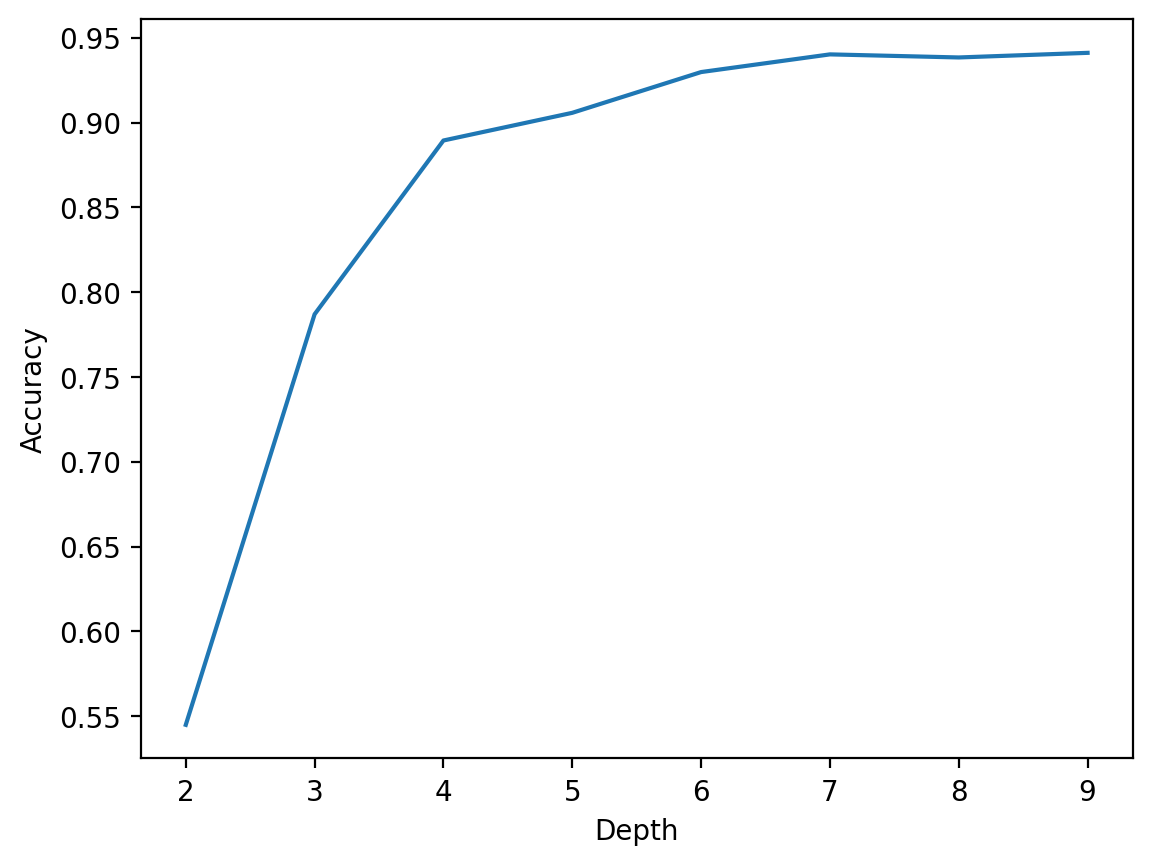

In [97]:
maxd = 0
max_accuracy = 0

depth_list = []
accuracy_list = []

for i in range(2,10):
    
    dt = DecisionTreeClassifier(criterion='gini', max_depth=i)
    X_train,X_test,y_train,y_test = train_test_split(X_features,y_features,test_size=0.3,random_state=20,stratify=y_features)
    # print(X_train.shape, y_train.shape)
    dt.fit(X_train, y_train)
    y_predicted = dt.predict(X_test)
    # print(y_predicted.shape)
    y_predicted = pd.Series(y_predicted, index=y_test.index)
    # accuracy = accuracy_score(y_test, y_predicted)
    # print(accuracy*100)
    # if accuracy*100>max_accuracy:
    #     maxd = i
    #     max_accuracy = accuracy * 100

    depth_list.append(i)
    accuracy = accuracy_score(y_test, y_predicted)
    accuracy_list.append(accuracy)
        
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average='weighted')
recall = recall_score(y_test, y_predicted, average='weighted')
conf_matrix = confusion_matrix(y_test, y_predicted)

plt.plot(depth_list,accuracy_list)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [98]:
print(f"Accuracy: {accuracy*100:.4f}")
print(f"Precision: {precision*100:.4f}")
print(f"Recall: {recall*100:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 94.1070
Precision: 94.1312
Recall: 94.1070
Confusion Matrix:
[[355   8   5   0   0   0]
 [ 11 300  11   0   0   0]
 [ 12   7 277   0   0   0]
 [  0   0   0 340  46   0]
 [  0   0   0  30 382   0]
 [  0   0   0   0   0 422]]


Result of Model with features in dataset > Model obtained by TSFEL > Model using raw accelerometer data